In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [2]:
brc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')

In [3]:
brc.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='diagnosis', ylabel='count'>

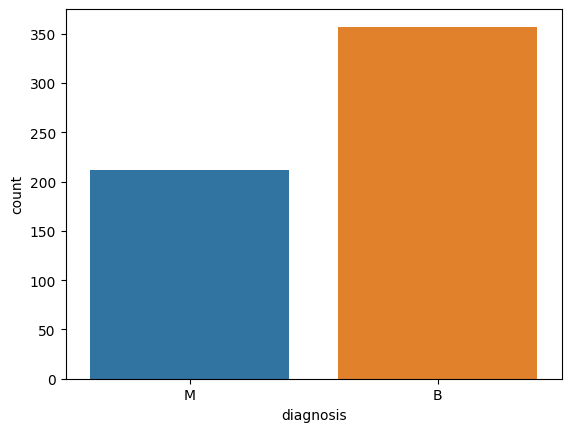

In [4]:
sns.countplot(x = 'diagnosis', data = brc)

In [5]:
brc = brc.drop(labels = 'id', axis = 1)
brc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
selected_features = {'texture_mean', 'smoothness_mean', 'texture_worst', 'smoothness_worst',	'symmetry_worst',	'fractal_dimension_worst'}
X = brc[selected_features]

<ipython-input-6-d6f103da4d02>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = brc[selected_features]


In [7]:
X.shape

(569, 6)

In [8]:
y = brc[['diagnosis']]
y.shape

(569, 1)

<Axes: >

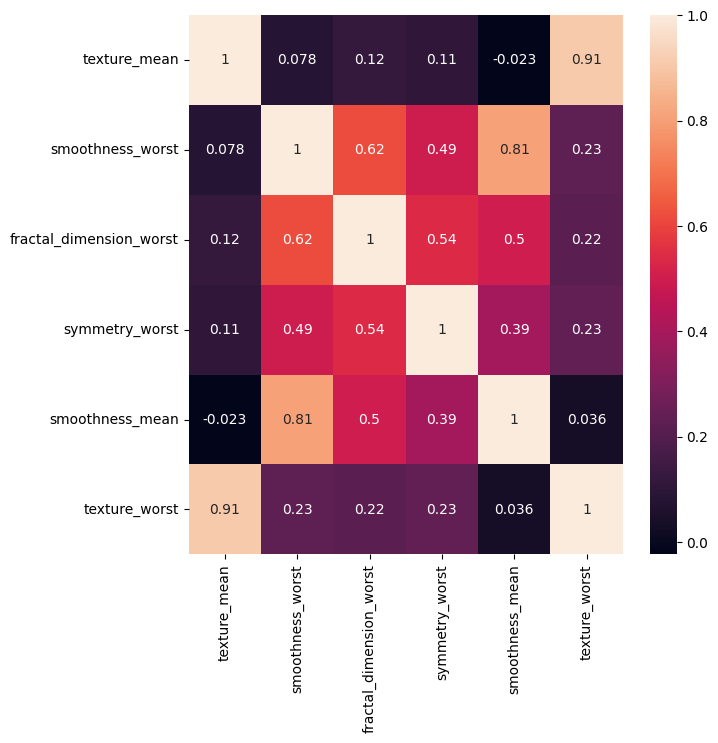

In [9]:
Fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(X.corr(), annot = True)

In [10]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
y = one_hot.fit_transform(y).toarray()

In [11]:
#X = brc.iloc[:,2:17].values

In [12]:
X.head(5)

,texture_mean,smoothness_worst,fractal_dimension_worst,symmetry_worst,smoothness_mean,texture_worst
0,10.38,0.1622,0.11890,0.4601,0.11840,17.33
1,17.77,0.1238,0.08902,0.2750,0.08474,23.41
2,21.25,0.1444,0.08758,0.3613,0.10960,25.53
3,20.38,0.2098,0.17300,0.6638,0.14250,26.50
4,14.34,0.1374,0.07678,0.2364,0.10030,16.67


In [13]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [14]:
from sklearn.preprocessing import MinMaxScaler
SS = MinMaxScaler()
X_scaled = SS.fit_transform(X)

In [15]:
X_scaled.shape

(569, 6)

In [16]:
y_scaled = SS.fit_transform(y)
y_scaled.reshape(-1,1)

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]])

In [17]:
y_scaled.shape

(569, 2)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled, test_size = 0.2)

In [19]:
X_train.shape

(455, 6)

In [20]:
X_test.shape

(114, 6)

In [21]:
y_train.shape

(455, 2)

In [22]:
y_test.shape

(114, 2)

In [23]:
input_shape = X_train.shape[1:]
input_shape

(6,)

In [24]:
model = tf.keras.models.Sequential();
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu', input_shape=(6,)))
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,617
Trainable params: 3,617
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [26]:

epoch_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 512)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/100
1/1 [===

In [27]:
epoch_hist.history.keys()

dict_keys(['loss', 'accuracy'])

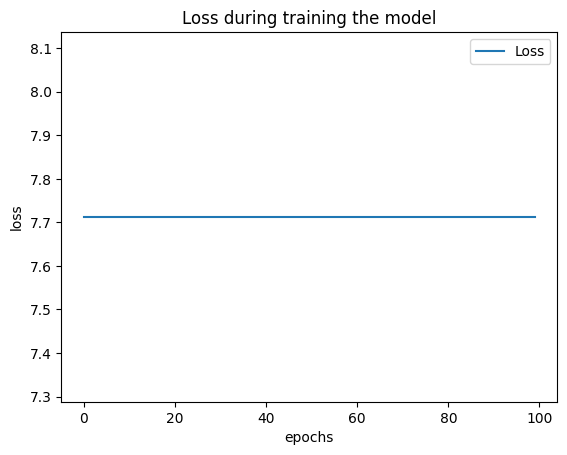

In [28]:
eh = epoch_hist.history['loss']
plt.plot(eh)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss during training the model')
plt.legend({'Loss'})

In [29]:

evaluation = model.evaluate(X_test, y_test)
print('test_accuracy:{}'.format(evaluation[1]*100))

4/4 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
test_accuracy:50.0


In [30]:
y_predict = model.predict(X_test)
y_predict

4/4 [==============================] - 0s 3ms/step


array([[-0.06040754],
       [-0.09348515],
       [-0.06052142],
       [-0.08270839],
       [-0.06644397],
       [-0.07611745],
       [-0.06976035],
       [-0.05511221],
       [-0.05639742],
       [-0.11361654],
       [-0.04398848],
       [-0.06487213],
       [-0.10293116],
       [-0.11110805],
       [-0.07928272],
       [-0.13724583],
       [-0.03707966],
       [-0.05280735],
       [-0.06347162],
       [-0.07903944],
       [-0.14951542],
       [-0.09382132],
       [-0.06027768],
       [-0.09905235],
       [-0.07257045],
       [-0.08587642],
       [-0.06313431],
       [-0.07247638],
       [-0.05024623],
       [-0.09817214],
       [-0.13886422],
       [-0.09105067],
       [-0.13551377],
       [-0.05008872],
       [-0.09627245],
       [-0.05884861],
       [-0.08674751],
       [-0.06926794],
       [-0.08763625],
       [-0.05178219],
       [-0.04509697],
       [-0.07663718],
       [-0.03628656],
       [-0.08571915],
       [-0.05873418],
       [-0

In [31]:
y_train_predict = model.predict(X_train)
y_train_predict

15/15 [==============================] - 0s 2ms/step


array([[-0.06120625],
       [-0.06539862],
       [-0.06474714],
       [-0.02783173],
       [-0.06895217],
       [-0.05727396],
       [-0.08651386],
       [-0.09249848],
       [-0.0858576 ],
       [-0.06657146],
       [-0.07188537],
       [-0.05499314],
       [-0.06893211],
       [-0.07209493],
       [-0.1023552 ],
       [-0.07258248],
       [-0.06216041],
       [-0.01569745],
       [-0.0579234 ],
       [-0.08785572],
       [-0.03714027],
       [-0.08008334],
       [-0.07168505],
       [-0.05717453],
       [-0.08560032],
       [-0.0759592 ],
       [-0.02932984],
       [-0.03259196],
       [-0.11139423],
       [-0.07933624],
       [-0.05771738],
       [-0.0703847 ],
       [-0.09511206],
       [-0.08992622],
       [-0.09534799],
       [-0.03646717],
       [-0.03310803],
       [-0.10596795],
       [-0.04254001],
       [-0.05234576],
       [-0.05834659],
       [-0.04188856],
       [-0.06073322],
       [-0.09094146],
       [-0.05179274],
       [-0

In [32]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [38]:
model1.fit(X_train,y_train)

LinearRegression()

In [39]:
model1.score(X_test, y_test)

0.3275994419667585

In [35]:
#y = y.reshape(-1,1)

In [36]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.7982456140350878

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.8157894736842105